<a href="https://colab.research.google.com/github/avigangarde/Google-Playstore-Analysis-/blob/main/Avinash_of_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

## Android is being adopted by a large population across the globe. Android is used in over 74% of the world market, so it's worth creating or developing apps for this mobile operating system. bold text
## It's also worth investing in apps if you expect them to gain wider traction in the future. To make sure apps are tailored to the needs of users the analysis of data from the Google Play Store apps is extremely valuable. It can help developers design apps that are tailored to what users want and investors with decisions about how best to invest in future.

In [1]:
# Lets import library
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# mount google drive to load file 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path_2='/content/drive/MyDrive/capstone csv files/User Reviews.csv'
df2=pd.read_csv(file_path_2)

In [5]:
file_path ='/content/drive/MyDrive/capstone csv files/Play Store Data.csv'
df1=pd.read_csv(file_path)

In [6]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
# Check the rows and columns in the data
df1.shape

(10841, 13)

In [9]:
df2.shape

(64295, 5)

In [10]:
# check the name of the columns
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

Let us first define what information the columns contain based on our inspection. play_store dataframe has 10841 rows and 13 columns. The 13 columns are identified as below:

1.App - It tells us about the name of the application with a short description (optional).

2.Category - It gives the category to the app.

3.Rating - It contains the average rating the respective app received from its users.

4.Reviews - It tells us about the total number of users who have given a review for the application.

5.Size - It tells us about the size being occupied the application on the mobile phone.

6.Installs - It tells us about the total number of installs/downloads for an application.

7.Type - IIt states whether an app is free to use or paid.

8.Price - It gives the price payable to install the app. For free type apps, the price is zero.

9.Content Rating - It states whether or not an app is suitable for all age groups or not.

10.Genres - It tells us about the various other categories to which an application can belong.

11.Last Updated - It tells us about the when the application was updated.

12.Current Ver - It tells us about the current version of the application.

13.Android Ver - It tells us about the android version which can support the application on its platform.

In [11]:
# It has just one numberical columns
df1.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# **1.Data cleaning**

We will mostly be working with these columns: "Rating", "Size", "Installs", "Price".First we clean up all the nan values in this column, either replace them with some other value or remove all the special characters that are present in the particular column. Let's clean up by removing these and converting each column to a numeric type.

In [13]:
# Check if there are any null values in the dataset
df1.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

From above table we can say that there null values present in the rating columns(1474 null values ),type( 1 null values)content rating has (1 null values) and the current version has 8 null values and the android version has the 3 null values.

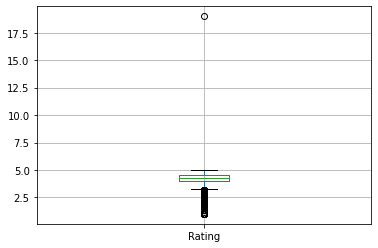

In [14]:
# lets take rating columns and find the if there are any outerlier present in it 
df1.boxplot()

We cam see that the most of the rating lies around the the 4.5 and we can conclude that the avergae rating of apps is around the 4.5 stars. we are also seen there is an oulier present in data lets find out that.

In [16]:
df1[(df1["Rating"]>5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [23]:
df1['Rating'][10838]

nan

In [15]:
df1[(df1["Rating"]>1)&(df1['Rating']<5) ]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [27]:
median_of_rating = df1['Rating'].median()
mean_of_rating=df1['Rating'].mean()

In [30]:
# lets replace the nan values with the mean or median of rating values /
# lets check the mean and median of the rating columns 
print(f'The median of rating columns is {median_of_rating}')
print(f'The mean of rating columns is {mean_of_rating}')

The median of rating columns is 4.3
The mean of rating columns is 4.193338315362443


In [35]:
# lets replace the nan values with the median of the rating column

df1['Rating']=df1['Rating'].fillna(mean_of_rating)

In [36]:
# check if there are any null values present in the rating columns
df1['Rating'].isnull().sum()


0